# Top 100 Words Closest to "Queer" for Lawrence

In [40]:
import gensim
import gensim.models
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os
from gensim import corpora
from pprint import pprint
from gensim.test.utils import datapath
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

In [41]:
from random import choices
from scipy.spatial.distance import cosine
import numpy as np

In [96]:
file = open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\lawrencecorpus.txt', 'r', encoding = 'latin-1')
data = file.read()
words = data.split()

print('Number of words in text file :', len(words))

Number of words in text file : 2371834


In [24]:
# #loading txt file and turning it into courpus

# class MyCorpus:
#     def __iter__(self):
#         corpus_path = datapath('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\lawrencecorpus.txt')    
#         for line in open(corpus_path, encoding = 'latin-1'):
#             yield gensim.utils.simple_preprocess(line)

# import gensim.models

# sentences = MyCorpus()

In [25]:
# %%time
# model = gensim.models.Word2Vec(sentences, iter=100)

Wall time: 9min 6s


In [26]:
# Save the model
#model.save("lawrence_word2vec.model")

In [90]:
# Load the model
# model = gensim.models.Word2Vec.load("lawrence_word2vec.model")

In [93]:
len(model.wv.vocab)

16023

In [42]:
def paragraphize(linelist): 
    paragraphlist = []
    sentence = []
    scount = 0
    for line in linelist:
        words = line.strip().split()
        for w in words:
            if not w.endswith('.'):
                sentence.append(w)
            elif scount < 2:
                sentence.append(w)
                scount += 1
            else:
                scount = 0
                sentence.append(w)
                stext = ' '.join(sentence)
                sentence = []
                paragraphlist.append(stext)
    print(len(linelist), len(paragraphlist))
    
    return paragraphlist

In [49]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\lawrencecorpus.txt', encoding = 'latin-1') as f:
    llines = f.readlines()

In [50]:
lparagraphs = paragraphize(llines)

294149 54401


In [51]:
for i in range(1):
    lsample = choices(lparagraphs, k = len(lparagraphs))
    class MyCorpus:
            def __iter__(self):
                global lsample    
                for line in lsample:
                    yield gensim.utils.simple_preprocess(line)

    sentences = MyCorpus()


In [52]:
%%time
model = gensim.models.Word2Vec(sentences, iter=100)

Wall time: 8min 19s


In [53]:
vector = model.wv['queer']  # get numpy vector of queer

In [54]:
sims = model.wv.most_similar('queer', topn=100)  # get top100 similar words
sims

[('sardonic', 0.4744440019130707),
 ('curious', 0.4588804244995117),
 ('goaty', 0.4504328966140747),
 ('crinkle', 0.4207095503807068),
 ('strange', 0.4126768112182617),
 ('dazzling', 0.40868866443634033),
 ('sharp', 0.3808276057243347),
 ('shy', 0.372184157371521),
 ('satanic', 0.37108778953552246),
 ('alert', 0.36816805601119995),
 ('odd', 0.3657391667366028),
 ('peculiar', 0.36236804723739624),
 ('wild', 0.36212968826293945),
 ('sullen', 0.3606123924255371),
 ('slight', 0.3603256344795227),
 ('sly', 0.3595714569091797),
 ('pathetic', 0.3543279767036438),
 ('comical', 0.3541949689388275),
 ('coarse', 0.35332927107810974),
 ('quick', 0.35281550884246826),
 ('pitiful', 0.3527315557003021),
 ('boyish', 0.352152943611145),
 ('funny', 0.352139949798584),
 ('bold', 0.34912484884262085),
 ('lazy', 0.34848451614379883),
 ('unearthly', 0.34769850969314575),
 ('concha', 0.34757930040359497),
 ('faint', 0.3473680019378662),
 ('crumpled', 0.3455961346626282),
 ('farouche', 0.34514766931533813),
 

In [55]:
import pandas as pd
df = pd.DataFrame(sims) # make sims a dataframe
df_new = df.rename(columns={'words': '0', 'similarity score': '1'})

In [56]:
lawrence_queersimilar = df_new[0].tolist()
#lawrence_queersimilar # get top 100 words as a list
lawrence_queersimilar.append('queer')
#add 'queer' to list

### Catagorizing Sentiments from a List of Top 100 Words Closest to Queer

In [57]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liunegative.txt', encoding = 'utf-8') as f:
    negative_words = [x.strip() for x in f.readlines()]
    
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liupositive.txt', encoding = 'utf-8') as f:
    positive_words = [x.strip() for x in f.readlines()]

In [31]:
%matplotlib notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [58]:
#turn my list into a data frame where each row represents an embedding.

vectordict = dict()
for v in lawrence_queersimilar:
    vectordict[v] = model.wv[v]

In [59]:
vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
vectordf.tail(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
curious,1.394822,-0.432981,0.345612,0.674746,1.265280,-0.668511,0.841233,0.855865,-0.112691,1.068171,...,-0.338676,-3.029075,-1.694859,-0.729564,-0.792953,-4.005474,2.592528,-2.177843,4.572911,0.622073
goaty,0.163654,0.531006,-0.015589,-0.718769,0.439425,-0.163196,-0.543927,-0.062656,-0.154899,0.117324,...,0.101479,-0.052162,-1.015898,0.954009,-0.730178,-0.663153,0.073412,-0.450155,0.534513,-0.052807
crinkle,0.858519,-0.696994,0.027405,0.614145,-0.312755,-0.859541,0.087344,1.918568,-0.220184,-0.069656,...,-0.341323,-1.267718,-1.831004,0.475423,0.993722,-0.406093,0.090545,-1.076173,-1.494001,-0.158799
strange,2.716303,-0.036594,-2.509634,0.642461,-2.433144,-0.890038,-0.159553,-1.349733,-1.747939,2.996385,...,-0.681027,-3.093827,-0.996598,0.393972,-0.441434,-1.121422,1.015001,-1.913192,4.265421,0.595261
dazzling,0.056526,0.698789,-0.347642,1.903857,0.872529,-0.344631,1.905300,-0.551518,0.178143,2.418376,...,-0.925582,-3.572441,-3.118565,0.569418,2.474885,-2.862067,0.962104,-1.814705,1.204666,0.630761
sharp,1.067953,-0.301049,-1.120129,-1.185641,2.406886,1.120914,1.749176,0.492414,-0.533808,0.678957,...,-1.721738,0.761390,-1.276553,2.947075,0.081291,0.569129,-1.105336,2.533357,0.759238,-0.688580
shy,1.275762,0.052055,0.323501,-1.872242,1.907694,0.267154,-0.581091,1.733642,-2.149603,1.866481,...,0.499646,0.400929,-2.715029,1.336353,2.112084,-1.583746,-1.428857,-1.177429,0.370889,-0.122546
satanic,-0.621384,0.609687,-1.051298,0.868822,0.806522,0.455783,0.717577,-0.591415,-0.906538,0.699644,...,-0.714064,-0.324300,-1.071661,0.266404,-0.702675,-0.902247,0.106356,0.017047,0.509118,-0.447994
alert,1.364201,-0.894414,1.323890,-0.274720,-0.799072,-0.116616,-0.425623,2.125631,0.635704,1.953139,...,3.734970,-0.803458,-5.509727,-1.951248,-0.426089,1.002167,-0.637190,-0.859861,1.319331,-0.920936
odd,-1.792409,-0.868918,0.569905,-0.808589,1.740264,3.729077,2.320484,-2.205653,-1.389627,-0.077453,...,2.095850,1.292940,-5.846918,-0.646035,1.215005,-2.480803,3.358319,0.799892,2.710724,-1.109522


In [60]:
#use dimension-reduction techniques to flatten it into a plane
def vocab2pca(lawrence_queersimilar):
    
    vectordict = dict()
    for v in lawrence_queersimilar:
        vectordict[v] = model.wv[v]
        
    vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
    
    vectorlengths = np.linalg.norm(vectordf, ord = 2, axis = 1)   # normalize vector lengths
    vectordf = vectordf.divide(vectorlengths, axis = 'rows')      # for PCA
    
    pca = PCA(n_components = 2)       
    components = pca.fit_transform(vectordf)                      # perform PCA
    plotframe = pd.DataFrame({'x': components[ : , 0], 'y': components[ : , 1]}, index = lawrence_queersimilar)
    
    return plotframe

In [61]:
plotframe = vocab2pca(lawrence_queersimilar)
plotframe

,x,y
sardonic,-0.250330,0.064883
curious,-0.139411,-0.005139
goaty,0.010954,0.196346
crinkle,0.145586,0.026942
strange,-0.113242,0.238824
dazzling,-0.032072,-0.074834
sharp,0.040457,0.275928
shy,-0.030485,-0.236154
satanic,-0.041928,0.129695
alert,0.186140,-0.097665


In [62]:
negativelist_lawrence = [w for w in lawrence_queersimilar if w in negative_words]
#negativelist_lawrence.remove('queer')
positivelist_lawrence = [w for w in lawrence_queersimilar if w in positive_words]
neutrallist_lawrence = [w for w in lawrence_queersimilar if w not in (negative_words + positive_words)]

In [63]:
plotframe_negative_lawrence = vocab2pca(negativelist_lawrence)
plotframe_positive_lawrence = vocab2pca(positivelist_lawrence)
plotframe_neutral_lawrence = vocab2pca(neutrallist_lawrence)
plotframe_negative_lawrence
plotframe_queer_lawrence = plotframe_negative_lawrence[(plotframe_negative_lawrence.index == 'queer')] #save 'queer' in separate dataframe
plotframe_negative_lawrence = plotframe_negative_lawrence.drop(['queer']) #drop 'queer' from plotframe_negative_lawrence
plotframe_negative_lawrence['sentiment']='negative' #add sentiment columns 
plotframe_positive_lawrence['sentiment']='positive'
plotframe_neutral_lawrence['sentiment']='neutral'
plotframe_queer_lawrence['sentiment']='queer'
plotframe_sentiment = pd.concat([plotframe_negative_lawrence,plotframe_positive_lawrence,plotframe_neutral_lawrence,plotframe_queer_lawrence]) #combine dataframes for plot
plotframe_sentiment

,x,y,sentiment
sardonic,0.065240,-0.262227,negative
strange,0.293499,0.197011,negative
odd,-0.204357,-0.163019,negative
peculiar,0.164867,-0.356269,negative
wild,0.197224,0.335135,negative
sullen,0.195972,0.278920,negative
sly,-0.010461,0.123720,negative
pathetic,-0.282615,0.001453,negative
comical,-0.300951,0.146137,negative
coarse,0.085776,0.434222,negative


### Visualization

In [94]:
def plot_the_frame(plotframe_sentiment):    
    plt.figure(figsize = (20, 22))
    color_dict = dict({'positive':'green', 'neutral':'blue','negative':'red','queer':'purple'})
    theplot = sns.scatterplot(x = plotframe_sentiment.iloc[ : , 0], y = plotframe_sentiment.iloc[ : , 1], hue=plotframe_sentiment.iloc[ : , 2], palette=color_dict)
    collabels = plotframe_sentiment.columns.tolist()
    theplot.set(xlabel = collabels[0], ylabel = collabels[1])


    for rownum in range(plotframe_sentiment.shape[0]):
        x = plotframe_sentiment.iloc[rownum, 0]
        y = plotframe_sentiment.iloc[rownum, 1]
        theplot.text(x + 0.003, y + .003, 
        plotframe_sentiment.index[rownum], horizontalalignment='left', 
        size='small', color='black', fontsize=10, weight='semibold')

    plt.title('Sentiments of the Top 100 Words Closest to Queer (Lawrence)', fontsize=15)
    plt.savefig('queersentiment_lawrence_04282022.png')
    plt.show()

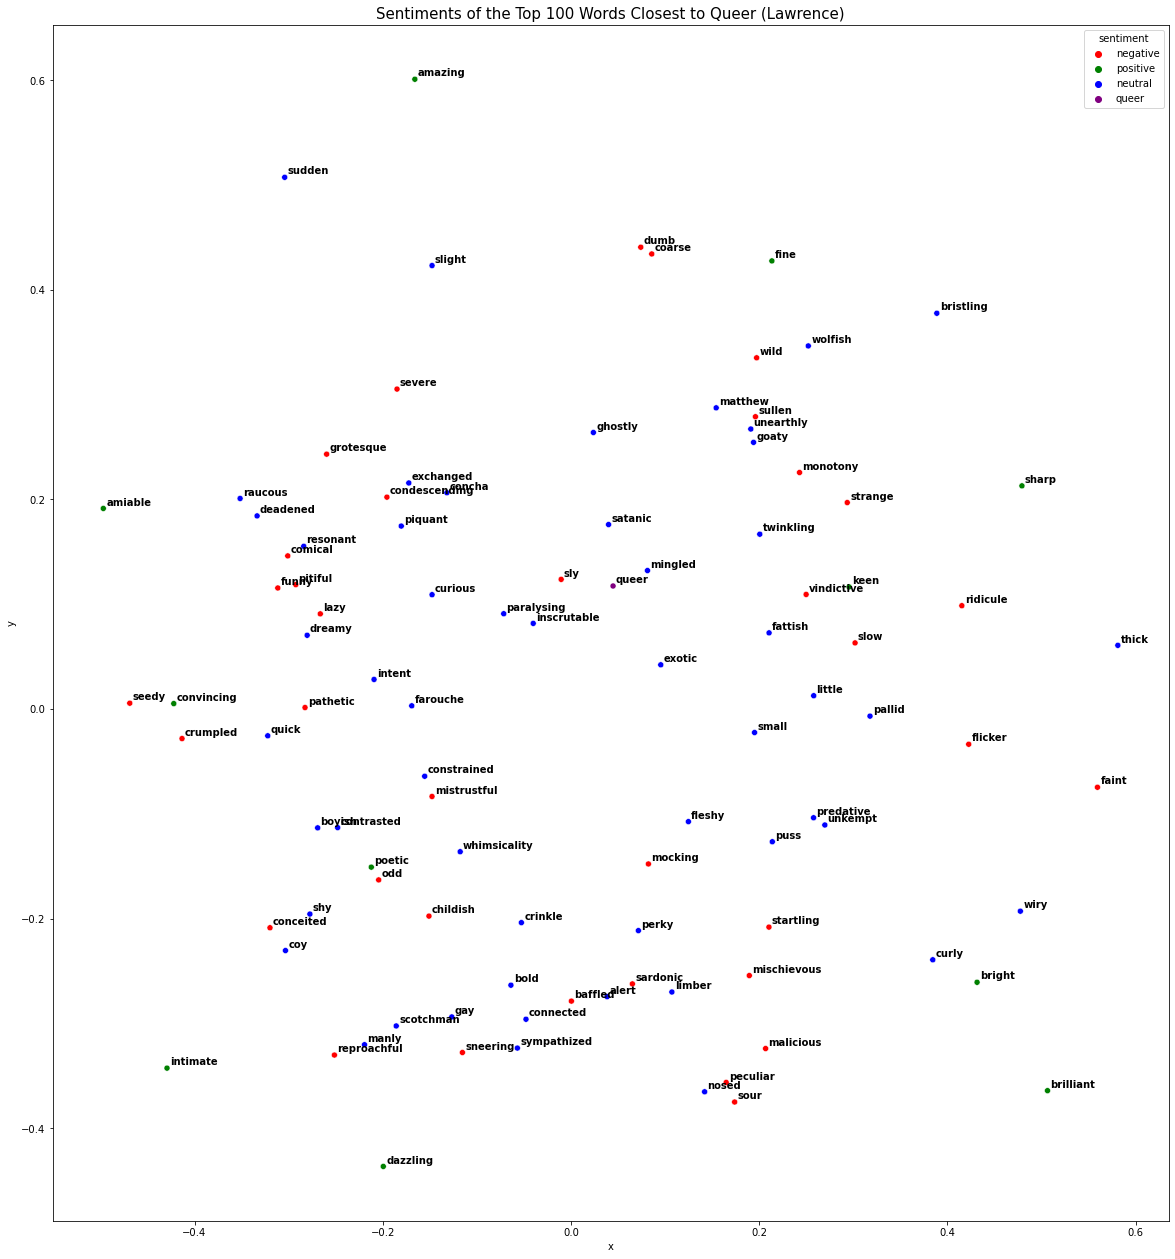

In [95]:
plot_the_frame(plotframe_sentiment)